In [489]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [490]:
df1 = pd.read_csv("ex_a.csv")
print(df1)

     x       y_0
0  0.5  0.099903
1  1.5  0.155093
2  2.5  0.211620
3  3.5  0.153054
4  4.5  0.145022
5  5.5  0.104727
6  6.5  0.049992
7  7.5  0.080588


coeffitients:  [ 3.55420507e-04 -8.41968791e-03  7.69036750e-02 -3.37059090e-01
  7.03760931e-01 -5.78869720e-01  2.50617714e-01]


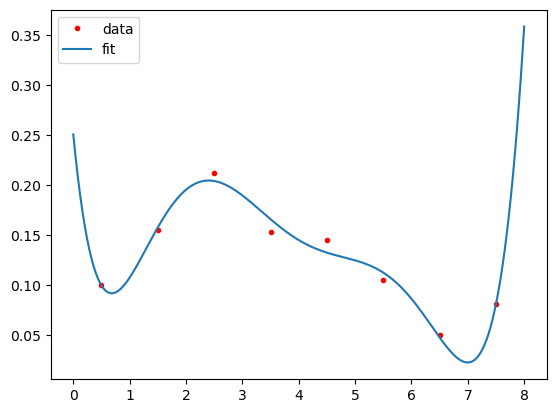

In [491]:
# a)
def design_matrix(x, p):
    A = np.column_stack([x**i for i in range(p+1)])
    return A
A = design_matrix(df1["x"], 6)
y = df1["y_0"]
a = np.linalg.inv(A.T @ A) @ A.T @ y
print("coeffitients: ",a[::-1])
plt.plot(df1["x"], df1["y_0"],"ro", markersize=3, label="data")
x = np.linspace(0, 8, 1000)
plt.plot(x, np.polyval(a[::-1], x), label="fit")
plt.legend(loc="best")

coeffitients lam = 0.1:  [ 1.74224758e-04 -4.20775437e-03  3.94215401e-02 -1.77606865e-01
  3.75357964e-01 -2.90330443e-01  1.77050740e-01]
coeffitients lam = 0.3:  [ 8.61845669e-05 -2.14506211e-03  2.09124764e-02 -9.84990979e-02
  2.14313205e-01 -1.58075960e-01  1.50745781e-01]
coeffitients lam = 0.7:  [ 4.11722173e-05 -1.06389616e-03  1.09107786e-02 -5.43577032e-02
  1.22822571e-01 -8.72509640e-02  1.42748813e-01]
coeffitients lam = 3.0:  [ 8.27190877e-06 -2.34330763e-04  2.73168070e-03 -1.54746402e-02
  3.71730605e-02 -2.53251853e-02  1.46435283e-01]
coeffitients lam = 10.0:  [ 1.85141428e-06 -5.87054983e-05  7.81631745e-04 -4.81347592e-03
  1.09495605e-02 -8.00754252e-03  1.50592686e-01]


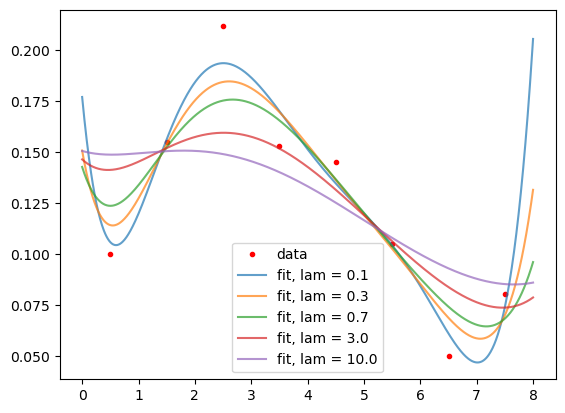

In [492]:
# b)
def matrix(n):
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = -2
        if i < n-1:
            A[i,i+1] = 1
            A[i+1,i] = 1
    A[0,0] = -1
    A[n-1,n-1] = -1
    return A
C = matrix(8)
def a_regu(A, C, lam, y):
    a_reg = np.linalg.inv(A.T @ A + lam * (C @ A).T @ (C @ A)) @ A.T @ y
    return a_reg

plt.plot(df1["x"], df1["y_0"],"ro", markersize=3, label="data")
lamb = np.array([0.1, 0.3, 0.7, 3, 10])
for i in range(len(lamb)):
    a_reg = a_regu(A, C, lamb[i], y)
    print("coeffitients lam = {}: ".format(lamb[i]),a_reg[::-1])
    plt.plot(x, np.polyval(a_reg[::-1], x), label="fit, lam = {}".format(lamb[i]), alpha=0.7)
plt.legend(loc="best")

coeffitients:  [ 1.52617867e-05 -4.52557703e-04  5.04529421e-03 -2.43761403e-02
  3.76978212e-02  2.27056916e-02  1.17045057e-01]
variance:  [-1.05225879e-03  3.55041635e-03 -3.43020665e-03  1.45199318e-03
 -3.04343154e-04  3.10361784e-05 -1.22896521e-06]
0    0.028136
1    0.028879
2    0.034110
3    0.034104
4    0.023153
5    0.019270
6    0.012265
7    0.013299
dtype: float64


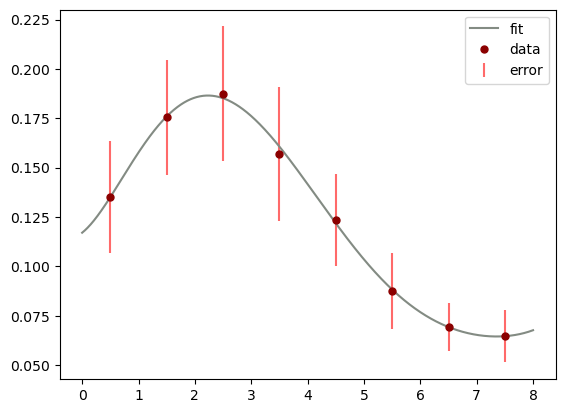

In [493]:
# c)
df2 = pd.read_csv("ex_c.csv")
#print(df2)

mean = np.mean(df2.iloc[:,1:], axis=1)
std = np.std(df2.iloc[:,1:], axis=1)
mean_std = np.mean(std)

var_y = np.diag(std**2)
W = np.linalg.inv(var_y)

a_weight = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ mean
print("coeffitients: ",a_weight[::-1])
var_a = np.linalg.inv(A.T @ W @ A)
var_a = np.mean(var_a, axis=1)
print("variance: ",var_a)
print(std)
plt.errorbar(df2["x"], mean, yerr=std, fmt="none", label="error", color="#FF6A6A")
plt.plot(x, np.polyval(a_weight[::-1], x), label="fit", color = "#838B83")
plt.plot(df2["x"], mean, markersize=5, label="data", marker="o", color="#8B0000", linestyle="none")
plt.legend(loc="best")